In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Playground

In [2]:
X,y = make_regression(n_samples=5,n_features=1,n_informative=1,n_targets=1,noise=40,random_state=2)

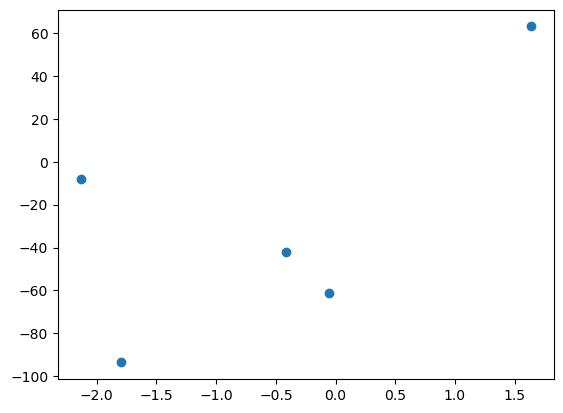

In [3]:
plt.scatter(X.ravel(),y)
plt.show()

In [4]:
lr = LinearRegression()

In [5]:
lr.fit(X,y)

LinearRegression()

In [6]:
lr.coef_

array([25.35020095])

In [7]:
lr.intercept_

-14.366432645301138

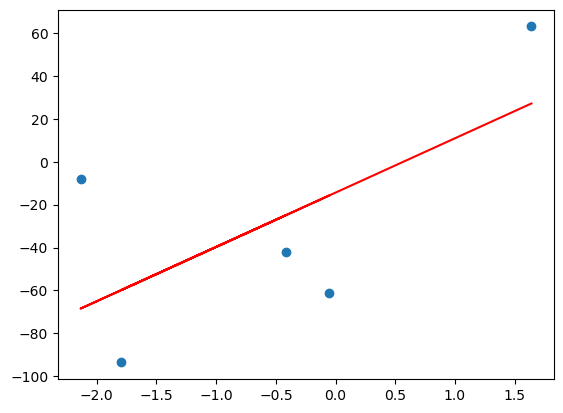

In [8]:
plt.scatter(X,y)
plt.plot(X.ravel(),lr.predict(X),color='red')
plt.show()

In [9]:
slope_0 = 1

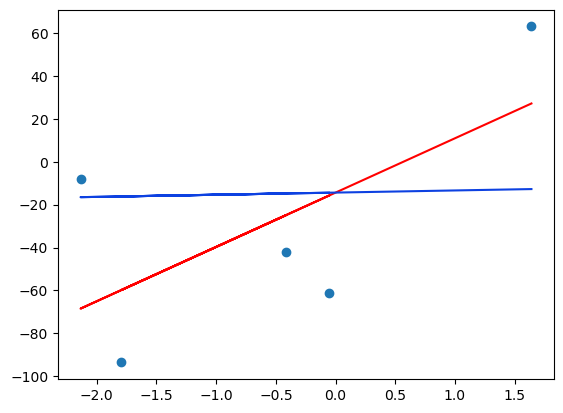

In [10]:
plt.scatter(X,y)
plt.plot(X.ravel(),lr.predict(X),color='red')
plt.plot(X,slope_0*X.ravel()+lr.intercept_,color='#0D41E1')
plt.show()

In [11]:
# iteration 1
slope_iter1 = slope_0 - 0.04*-2*np.sum(X.ravel()*(y-slope_0*X.ravel()-lr.intercept_))

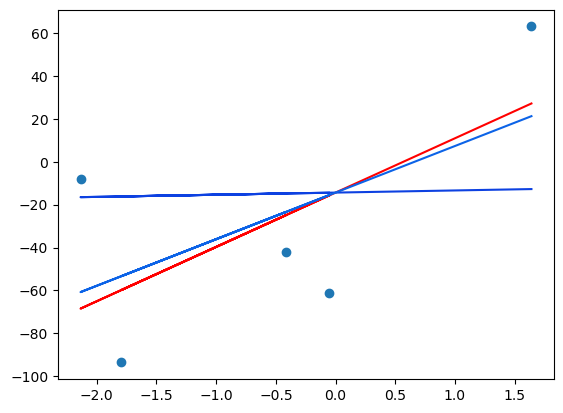

In [12]:
plt.scatter(X,y)
plt.plot(X.ravel(),lr.predict(X),color='red')
plt.plot(X,slope_0*X.ravel()+lr.intercept_,color='#0D41E1')
plt.plot(X,slope_iter1*X.ravel()+lr.intercept_,color='#0C63E7')
plt.show()

In [13]:
# iteration 2
slope_iter2 = slope_iter1 - 0.04*-2*np.sum(X.ravel()*(y-slope_iter1*X.ravel()-lr.intercept_))

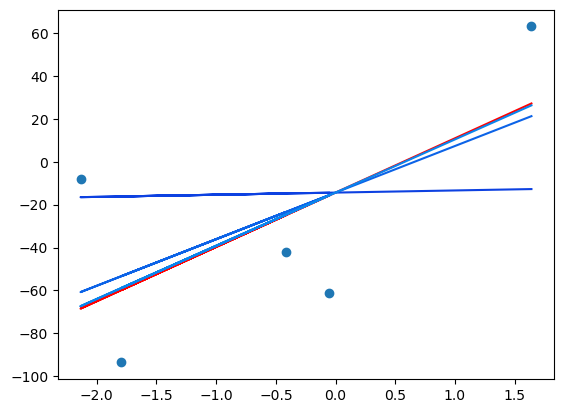

In [14]:
plt.scatter(X,y)
plt.plot(X.ravel(),lr.predict(X),color='red')
plt.plot(X,slope_0*X.ravel()+lr.intercept_,color='#0D41E1')
plt.plot(X,slope_iter1*X.ravel()+lr.intercept_,color='#0C63E7')
plt.plot(X,slope_iter2*X.ravel()+lr.intercept_,color='#0A85ED')
plt.show()

In [15]:
# iteration 3
slope_iter3 = slope_iter2 - 0.04*-2*np.sum(X.ravel()*(y-slope_iter2*X.ravel()-lr.intercept_))

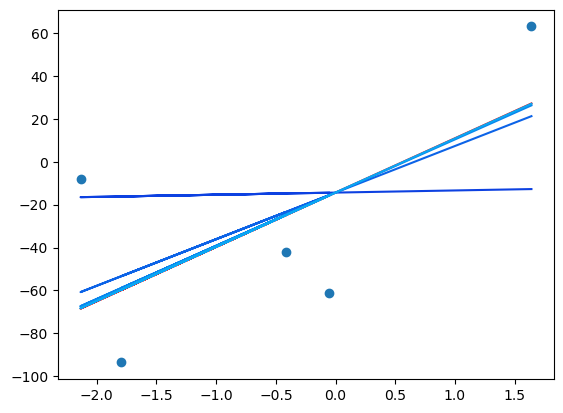

In [16]:
plt.scatter(X,y)
plt.plot(X.ravel(),lr.predict(X),color='red')
plt.plot(X,slope_0*X.ravel()+lr.intercept_,color='#0D41E1')
plt.plot(X,slope_iter1*X.ravel()+lr.intercept_,color='#0C63E7')
plt.plot(X,slope_iter2*X.ravel()+lr.intercept_,color='#0A85ED')
plt.plot(X,slope_iter3*X.ravel()+lr.intercept_,color='#09A6F3')
plt.show()

In [17]:
# iteration 4
slope_iter4 = slope_iter3 - 0.04*-2*np.sum(X.ravel()*(y-slope_iter3*X.ravel()-lr.intercept_))

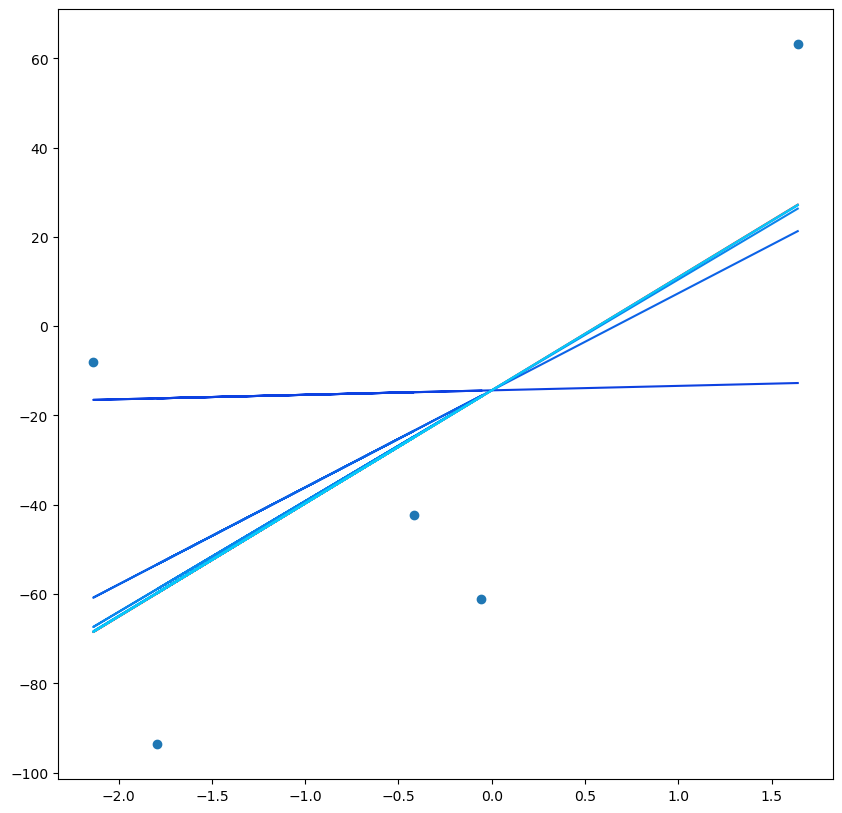

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(X,y)
plt.plot(X.ravel(),lr.predict(X),color='red')
plt.plot(X,slope_0*X.ravel()+lr.intercept_,color='#0D41E1')
plt.plot(X,slope_iter1*X.ravel()+lr.intercept_,color='#0C63E7')
plt.plot(X,slope_iter2*X.ravel()+lr.intercept_,color='#0A85ED')
plt.plot(X,slope_iter3*X.ravel()+lr.intercept_,color='#09A6F3')
plt.plot(X,slope_iter4*X.ravel()+lr.intercept_,color='#07C8F9')
plt.show()

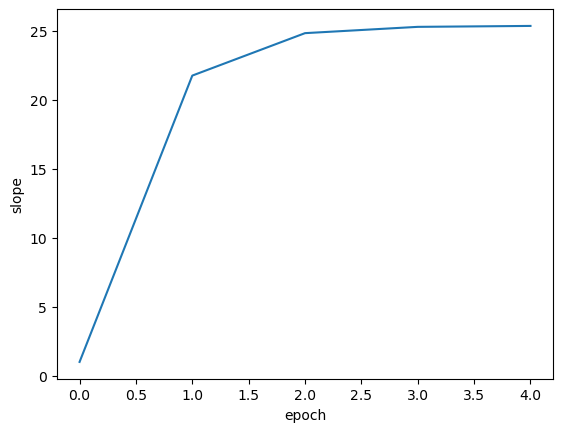

In [19]:
plt.plot(np.array([slope_0,slope_iter1,slope_iter2,slope_iter3,slope_iter4]))
plt.xlabel('epoch')
plt.ylabel('slope')
plt.show()

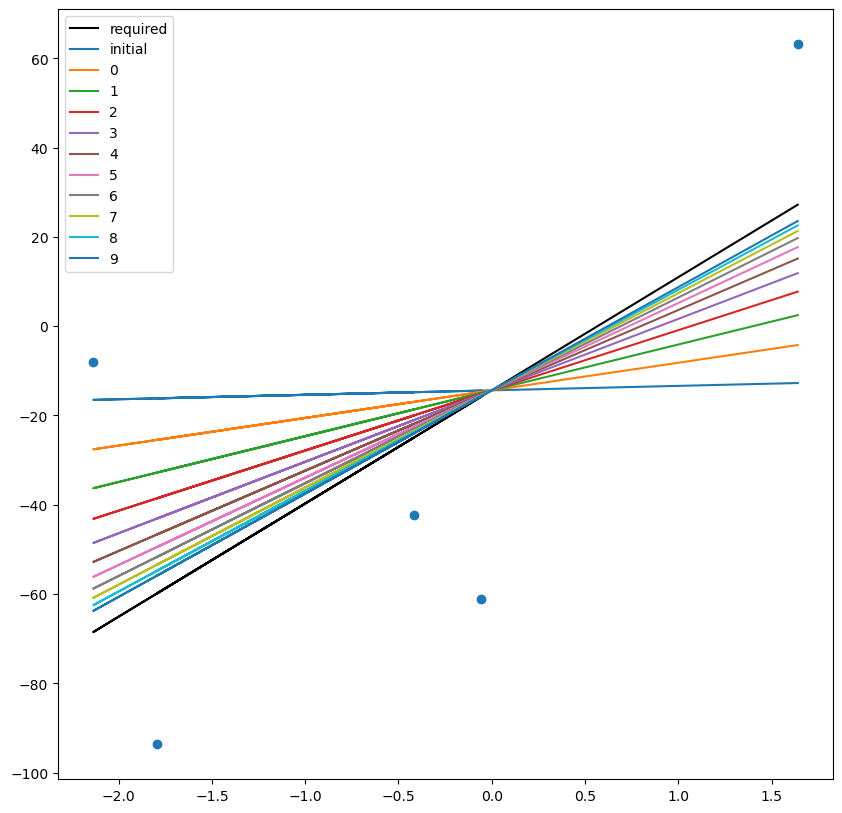

In [20]:
b = lr.intercept_
m = 1
rate = 0.01 # determines the speed of convergence, need to choose optimal rate to converge to minima in least number of epochs

epochs = 10

plt.figure(figsize=(10,10))
plt.plot(X.ravel(),lr.coef_*X.ravel()+lr.intercept_,label='required',color='black')
plt.plot(X.ravel(),m*X.ravel()+b,label='initial')

for e in range(epochs):
    loss_slope = -2*np.sum(X.ravel()*(y-m*X.ravel()-b))
    m = m - (rate*loss_slope)
    
    y_pred = m*X.ravel()+b
    
    plt.plot(X.ravel(),y_pred,label=f'{e}')

plt.scatter(X,y)   
plt.legend()
plt.show()

# Own Class

In [21]:
X,y = make_regression(n_samples=30,n_features=1,n_informative=1,n_targets=1,noise=10,random_state=42)

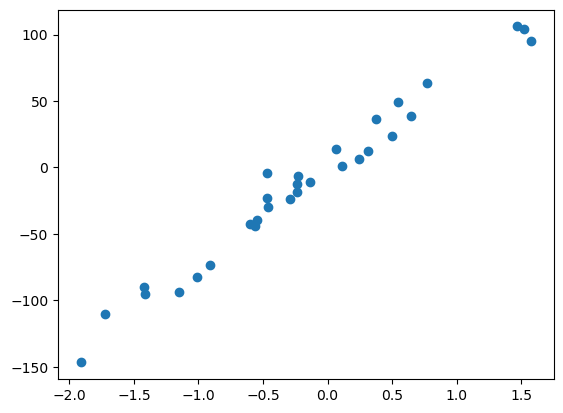

In [22]:
plt.scatter(X,y)
plt.show()

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X,y)

LinearRegression()

In [25]:
print(lr.coef_)
print(lr.intercept_)

[69.42349549]
-0.1290294058285575


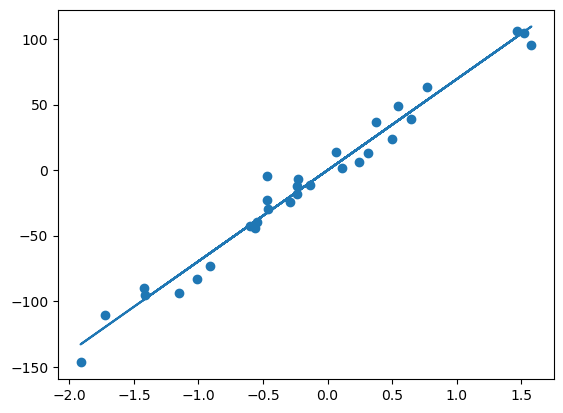

In [26]:
plt.scatter(X,y)
plt.plot(X.ravel(),lr.coef_[0]*X.ravel()+lr.intercept_)
plt.show()

In [27]:
# assuming we know weight
class GradientDescent:

    def __init__(self,learning_rate,epochs):
        self.slope = lr.coef_[0]
        self.bias = -250
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X,y):

        ls = []
        b = []
        
        for e in range(self.epochs):
            loss_slope = -2 * np.sum(y-self.slope*X.ravel()-self.bias)
            self.bias = self.bias - (self.lr*loss_slope)
            ls.append(loss_slope)
            b.append(self.bias)
            #print(f'epoch:{e}-->loss_slope:{loss_slope}-->bias:{self.bias}')
        print(self.bias)

        return ls,b
        

In [28]:
gd = GradientDescent(0.01,15)

In [29]:
loss_slope,bias = gd.fit(X,y)

-0.1292977027402961


In [30]:
b0 = np.linspace(-120,0,100)
loss_function = [np.sum(np.power(y-lr.coef_[0]*X.ravel()-b,2)) for b in b0]
loss_gd = [np.sum(np.power(y-lr.coef_[0]*X.ravel()-b,2)) for b in bias]

Text(0, 0.5, 'cost')

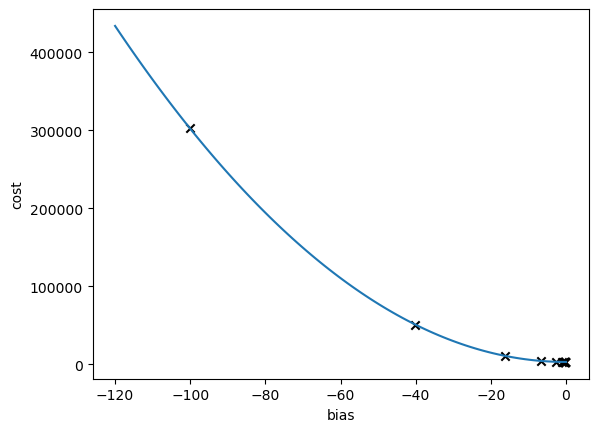

In [31]:
plt.plot(b0,loss_function)
plt.scatter(bias,loss_gd,marker='x',color='black')
plt.xlabel('bias')
plt.ylabel('cost')

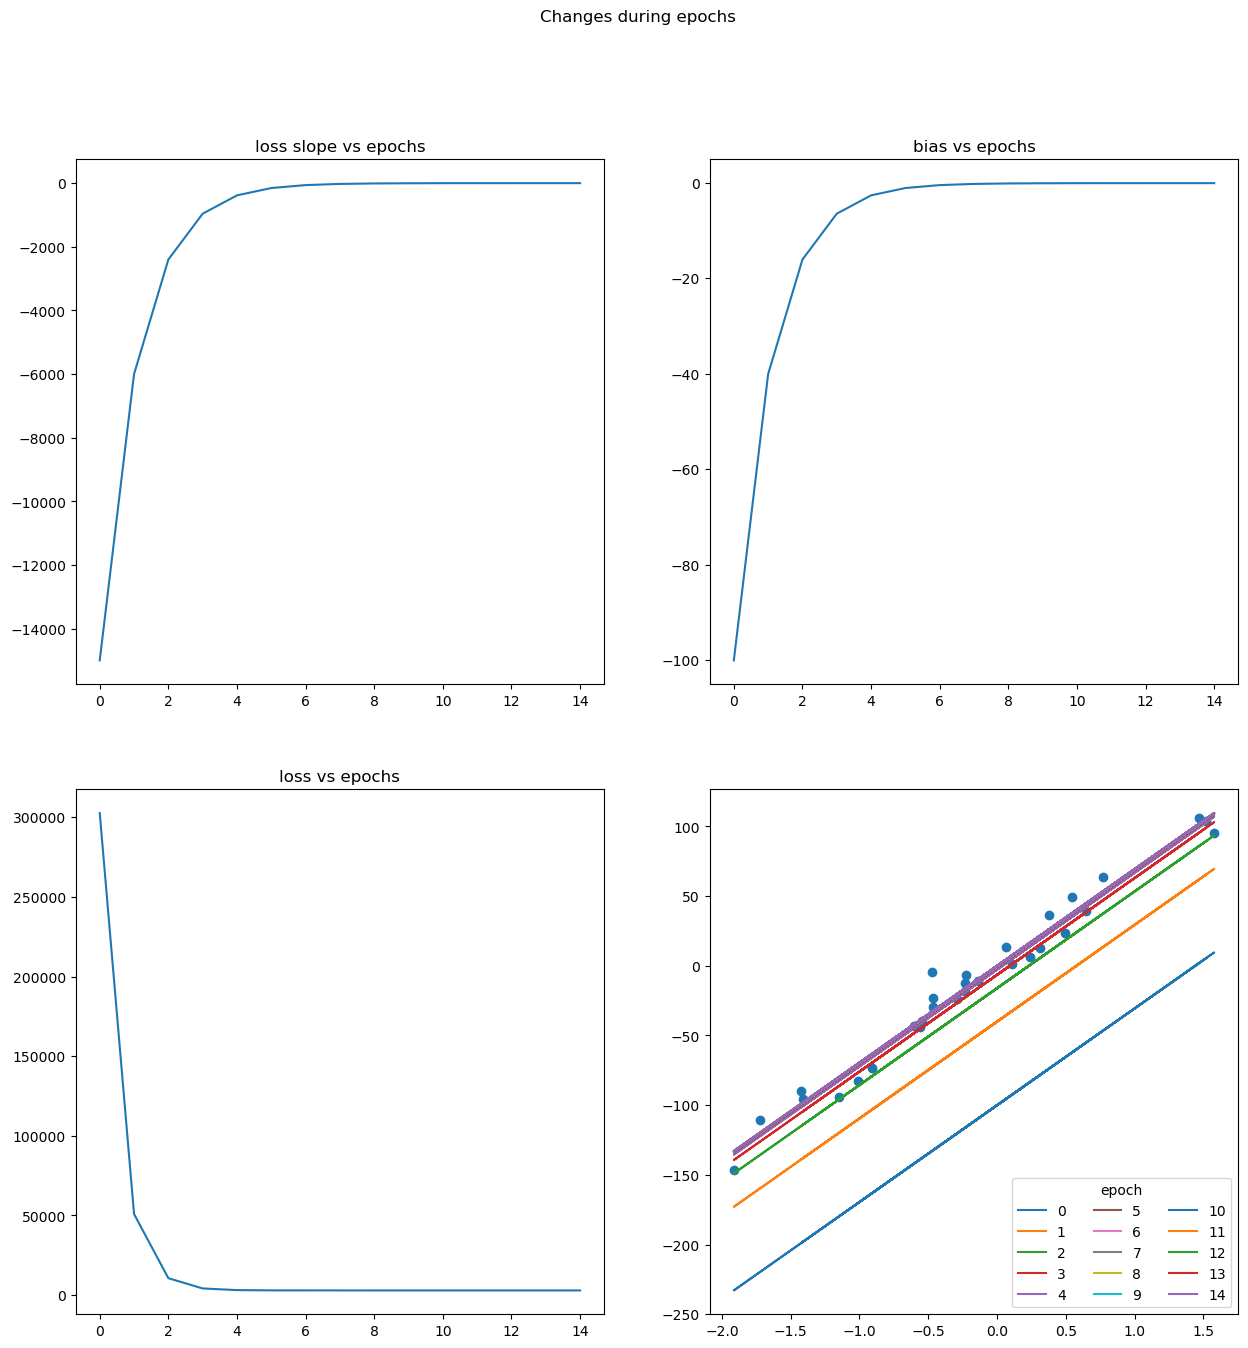

In [32]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(15,15))
ax[0,0].plot(np.array(loss_slope))
ax[0,0].set_title('loss slope vs epochs')
ax[0,1].plot(np.array(bias))
ax[0,1].set_title('bias vs epochs')
ax[1,0].plot(np.array(loss_gd))
ax[1,0].set_title('loss vs epochs')
ax[1,1].scatter(X,y)
for e,b in enumerate(bias):
    ax[1,1].plot(X.ravel(),lr.coef_[0]*X.ravel()+b,label=f'{e}')
ax[1,1].legend(loc=4,ncol=3,title='epoch')
fig.suptitle('Changes during epochs')
plt.show()

In [33]:
class GradientDescent:

    def __init__(self,learning_rate,epochs):
        self.slope = 0
        self.bias = 200
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X,y):

        m = [self.slope]
        b = [self.bias]
        
        for e in range(self.epochs):
            b_slope = -2 * np.sum(y-self.slope*X.ravel()-self.bias)
            m_slope = -2*np.sum(X.ravel()*(y-self.slope*X.ravel()-self.bias))
            self.bias = self.bias - (self.lr*b_slope)
            self.slope = self.slope - (self.lr*m_slope)
            b.append(self.bias)
            m.append(self.slope)
            #print(f'epoch:{e}-->loss_slope:{loss_slope}-->bias:{self.bias}')
        print(self.slope)
        print(self.bias)

        return m,b

    def predict(self,X):
        return self.slope*X.ravel()+self.bias

        

In [34]:
gd = GradientDescent(0.01,50)

In [35]:
m,b = gd.fit(X,y)

69.42349548879578
-0.1290294057915736


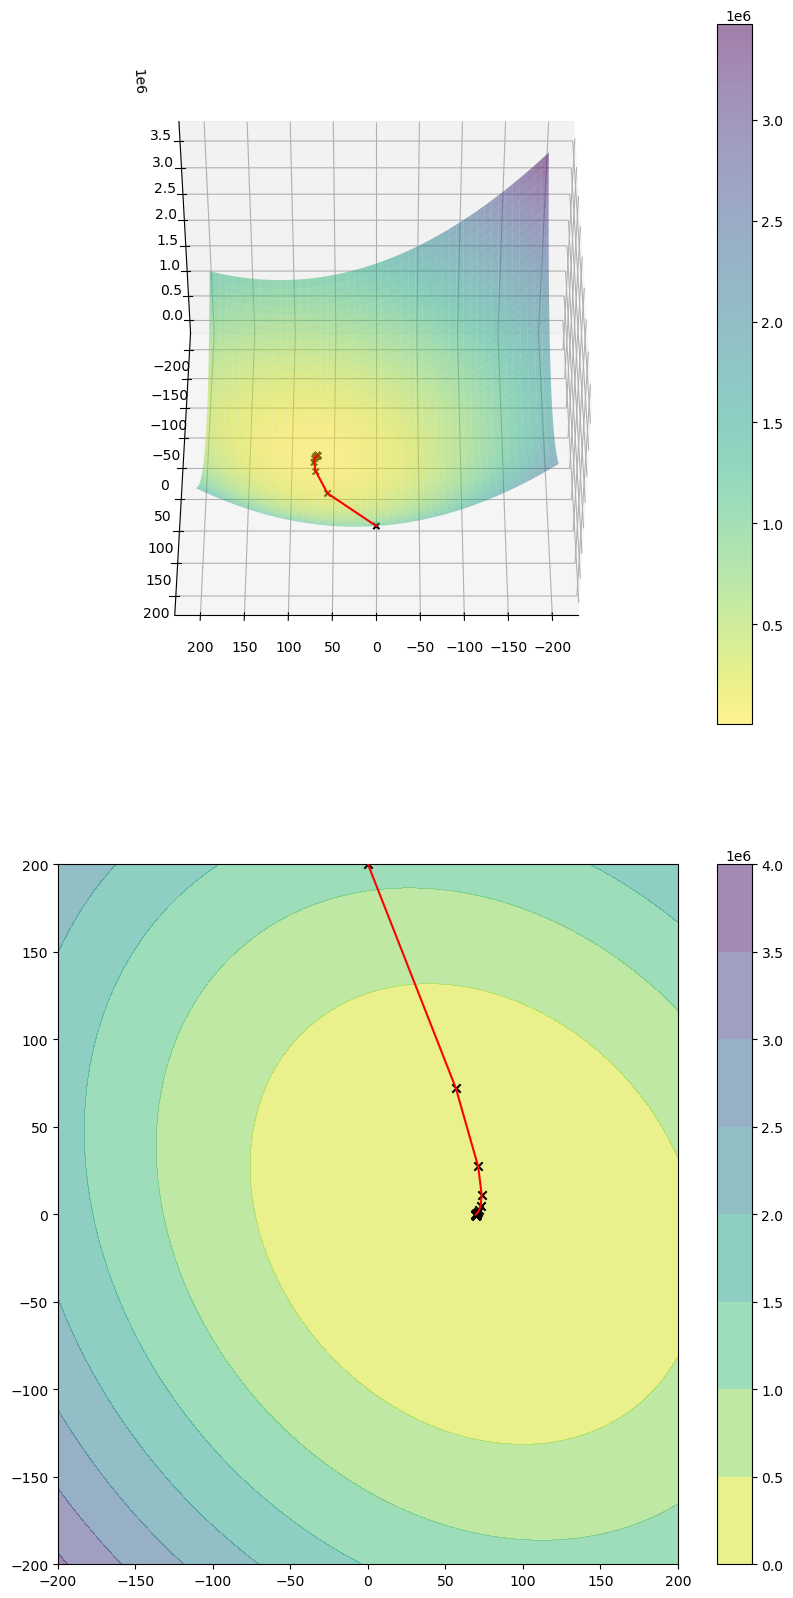

In [36]:
slope = np.linspace(-200,200,100)
bias = np.linspace(-200,200,100)

w1, w0 = np.meshgrid(slope,bias)

loss = []
gd_loss =[]
for j,k in zip(w1.ravel(),w0.ravel()):
    loss.append(np.sum(np.power(y - (j*X.ravel()-k), 2)))

for c,d in zip(m,b):
    gd_loss.append(np.sum(np.power(y - (c*X.ravel()-d), 2)))

loss = np.array(loss).reshape(100,100)

fig = plt.figure(figsize=(10,20))


ax = plt.subplot(2,1,1,projection='3d')
ax.view_init(45,90)
p = ax.plot_surface(w1,w0,loss,zorder=1,cmap='viridis_r',alpha=0.5)
ax.scatter3D(m,b,gd_loss,c='black',marker='x',zorder=40,alpha=1)
ax.plot3D(m,b,gd_loss,color='red',zorder=40,alpha=1)
fig.colorbar(p)

ax1 = plt.subplot(2,1,2)
f = ax1.contourf(w1,w0,loss,zorder=1,cmap='viridis_r',alpha=0.5)
ax1.scatter(m,b,c='black',marker='x',zorder=40,alpha=1)
ax1.plot(m,b,color='red',zorder=40,alpha=1)
fig.colorbar(f)

plt.show()

In [37]:
lr.predict(X)

array([ -80.03502684,  -39.16499516,   -9.72782049,  -16.38363538,
        105.60502696,  -70.44330612,    7.5716045 ,   16.66883726,
         21.68711887,  -98.17608904,  -32.72158232,  -32.30110551,
        -63.16723472,  109.50544437,   37.53738533,  101.62143129,
          4.55901461,  -37.92198103, -132.95563184, -119.87885477,
        -41.82746679,  -20.37942913,   34.35460335,   25.95324028,
        -15.80320938,   53.14897205,  -32.46161685,   44.8357729 ,
        -16.38477516,  -99.04002868])

In [38]:
gd.predict(X)

array([ -80.03502684,  -39.16499516,   -9.72782049,  -16.38363538,
        105.60502696,  -70.44330612,    7.5716045 ,   16.66883726,
         21.68711887,  -98.17608904,  -32.72158232,  -32.30110551,
        -63.16723472,  109.50544437,   37.53738533,  101.62143129,
          4.55901461,  -37.92198103, -132.95563184, -119.87885477,
        -41.82746679,  -20.37942913,   34.35460336,   25.95324028,
        -15.80320938,   53.14897205,  -32.46161685,   44.8357729 ,
        -16.38477516,  -99.04002868])

In [39]:
lr.score(X,y)

0.9750528924547933

In [40]:
from sklearn.metrics import r2_score

In [41]:
r2_score(y,lr.predict(X))

0.9750528924547933

In [42]:
r2_score(y,gd.predict(X))

0.9750528924547933